In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="white")

In [3]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()

In [4]:
# label = rome, paris, pune
# 0,1,2

# oneHoTencoder

# 0 0
# 0 1
# 1 0



In [5]:
df = pd.read_csv("final_export.csv")

/home/bhrt/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (7,10,11,15,21,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df.shape

(24234, 39)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24234 entries, 0 to 24233
Data columns (total 39 columns):
PAYMENTTOKENID               24234 non-null object
MERCHANTID                   24166 non-null object
CURRENCYTYPE                 23721 non-null object
AMOUNT                       24232 non-null float64
INVOICEID                    23354 non-null object
TRANSACTIONID                23333 non-null object
DESCRIPTION                  24096 non-null object
PAYMENTOPTION                24164 non-null object
PAYMENTOPTIONDESC            22873 non-null object
INITIALURL                   4853 non-null object
ACCTYPE                      23724 non-null object
AUTHRESULT                   23765 non-null object
EXPIRYTIME                   23665 non-null float64
IPADDRESS                    9050 non-null object
USERID                       9688 non-null object
TRANSACTIONRESULT            23614 non-null object
AMOUNTDEDUCTED               23764 non-null float64
TRANSACTIONTIME         

In [8]:
df.head(5)

,PAYMENTTOKENID,MERCHANTID,CURRENCYTYPE,AMOUNT,INVOICEID,TRANSACTIONID,DESCRIPTION,PAYMENTOPTION,PAYMENTOPTIONDESC,INITIALURL,...,COREREFNO,RESERVE1,RESERVE2,TXMERCHANTACCOUNT,TXDIRECTION,IBUSERID,FAILEDREASON,MINISTERY_TYPE,MINISTERY_STATUS,MINISTERY_RESPONSE
0,pTY12P19/J74VJ+B81qrW9S0POA=,3zj8pEw96jSgMxu7PqLioz9Q2jg=,USD,1.0,NaN,NaN,1@DEP/A/5611/LHPP,1,1@DEP/A/5611/LHPP,NaN,...,NaN,NaN,0.0,1.086982e+10,2.0,NaN,NaN,NaN,NaN,NaN
1,q+VwbNG3zyzuQRGAbd9N8lQItgg=,qIcBVYncKJs5CTsWkRPPzoGjN9U=,KHR,100000.0,20170220,561,10@mobile,2,10@mobile,https://www.registeredurl.com/,...,NaN,NaN,0.0,NaN,0.0,XPAYqlcvrEwOh7eO5BKjnD86tQeDVT4=,NaN,NaN,NaN,NaN
2,9MvBfWe+UDngG2njrFkWPBHjTrM=,qIcBVYncKJs5CTsWkRPPzoGjN9U=,KHR,100.0,20170220,561,10@mobile,1,mobile,https://www.registeredurl.com/,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,aKyH1DkBosaB3NhdmE3JL+PLhNA=,qIcBVYncKJs5CTsWkRPPzoGjN9U=,KHR,100000.0,20170220,10000,10@mobile,1,mobile,https://www.registeredurl.com/,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4,uRD7TqhbxsiNGZ8h1lcSrdRqoRk=,qIcBVYncKJs5CTsWkRPPzoGjN9U=,USD,500.0,8721862,1552439236902,1@Motorola156,2,1@Motorola156,NaN,...,FT1907205YCYLDGR,USD,0.0,NaN,0.0,XPAY1NQucr7eO5609lDHhkKBa3yV8lk=,NaN,NaN,NaN,NaN


# 1- PAYMENTTOKEN_ID --> Drop it

In [9]:
df['PAYMENTTOKENID'].value_counts()

                                399
                                  2
NTTtX0e0yXXSWWZqTL5EYcIQfzs=      1
w+2qeotKRBncaEbshiAK1S1hdg0=      1
XQa6fraeiyrnsrijm2F/chYyYE8=      1
                               ... 
F8pZ3+oKpjxN2VLkEXWAYFZKa88=      1
+le1gSJvj1sYstt+YEyNiuI3WSs=      1
8Q3IxbNeWj3fza2NIiDhamkuJ2I=      1
DxCGzIPCiBMv0isJyi825QW7X/M=      1
UVAnyVnPDW6NMf+gqFQLZI2ZPY0=      1
Name: PAYMENTTOKENID, Length: 23835, dtype: int64

In [10]:
df=df.drop(labels="PAYMENTTOKENID",axis=1)

In [11]:
############dropping as of no use

# 2- MERCHANT_ID --> 

In [12]:
df['MERCHANTID'].value_counts()

qIcBVYncKJs5CTsWkRPPzoGjN9U=    4126
Iv7guYSRaGlbn8VtE6ggOcvJaEw=    3320
OiiV9lElGi7dr9W8vEJ+s7AiNuU=    3017
/YhHi3+sdQKrev3Jftz2j7gi0fc=    2460
OGLyZb6Becol1flTnzJbQcuMgvY=    2260
sJ9IV7KGWDzJ8lewFFk5roa4NOc=    1733
lLNwopc0JRtnGqH2H1FpNS4AX6w=    1114
dzWRz4j29lF6s4du9N6zZQuEHmE=     679
Govr/9xSzpe9+QZUCHdna9qdY3A=     559
JgCNsg4v6EqeJCD+oppKIKrqDLY=     555
D9FKOsUTR1mOjFwJJmKHmWAACvg=     502
NPcDKCr1nq8RYtw3ckDv6q8+rh4=     449
msaZn/oKWm62QasqrWqG/SK7rVQ=     394
3dhwRylPo/1aZJEWSds7bx84cT0=     390
sfWcxlbvfgdt+2q4SEnbX9mBEyo=     380
Mp1WW5Ff9xtpCqM4v1BFPeToOKw=     347
2                                331
Gp4DCQV0Z7t/oDjtJhdi+w66W8I=     249
3zj8pEw96jSgMxu7PqLioz9Q2jg=     241
ur/b0VC1IkH4PbweFD6Y6Ugxzr4=     204
myTyNMOCJUG+jzbbKch5A/1dqLo=     155
87880MWyMwompQFBIKTsIBYSgeE=     154
3sViRaTvy2LJ7jHcqxSG4rJIf3Y=     143
C0V5fDbR+MRQKJ0r1B/YwHmJoPw=     127
AoGGr/9CbWw82q1Z7meWv7uxEVY=     111
EnRKL8zXkSnMpLuHhdRewhmJ4qg=      54
18GJqJDTj3OmKcccHMEnq7w4kXU=      32
6

In [13]:
df['MERCHANTID']=df['MERCHANTID'].replace(to_replace ="qIcBVYncKJs5CTsWkRPPzoGjN9U=", 
                 value ="A")

In [14]:
df['MERCHANTID']=df['MERCHANTID'].replace(to_replace = "Iv7guYSRaGlbn8VtE6ggOcvJaEw=",value="B")

In [15]:
df['MERCHANTID']=df['MERCHANTID'].replace(to_replace = "OiiV9lElGi7dr9W8vEJ+s7AiNuU=",value="C")

In [16]:
df['MERCHANTID']=df['MERCHANTID'].replace(to_replace = "/YhHi3+sdQKrev3Jftz2j7gi0fc=",
                                         value="D")

In [17]:
df['MERCHANTID']=df['MERCHANTID'].replace(to_replace = "OGLyZb6Becol1flTnzJbQcuMgvY=",
                                         value="E")

In [18]:
df['MERCHANTID']=df['MERCHANTID'].replace(to_replace="sJ9IV7KGWDzJ8lewFFk5roa4NOc=",
                                         value="F")

In [19]:
df['MERCHANTID']=df['MERCHANTID'].replace(to_replace="lLNwopc0JRtnGqH2H1FpNS4AX6w=",
                                         value="G")

In [20]:
df['MERCHANTID']=df['MERCHANTID'].replace(to_replace="dzWRz4j29lF6s4du9N6zZQuEHmE=",
                                         value="H")

In [21]:
df['MERCHANTID']=df['MERCHANTID'].replace(to_replace="Govr/9xSzpe9+QZUCHdna9qdY3A=",
                                         value="I")

In [22]:
df['MERCHANTID']=df['MERCHANTID'].replace(to_replace="JgCNsg4v6EqeJCD+oppKIKrqDLY=",
                                         value="J")

In [23]:
df['MERCHANTID']=df['MERCHANTID'].replace(to_replace="D9FKOsUTR1mOjFwJJmKHmWAACvg=",
                                         value="K")

In [24]:
df['MERCHANTID'].value_counts()

A                               4126
B                               3320
C                               3017
D                               2460
E                               2260
F                               1733
G                               1114
H                                679
I                                559
J                                555
K                                502
NPcDKCr1nq8RYtw3ckDv6q8+rh4=     449
msaZn/oKWm62QasqrWqG/SK7rVQ=     394
3dhwRylPo/1aZJEWSds7bx84cT0=     390
sfWcxlbvfgdt+2q4SEnbX9mBEyo=     380
Mp1WW5Ff9xtpCqM4v1BFPeToOKw=     347
2                                331
Gp4DCQV0Z7t/oDjtJhdi+w66W8I=     249
3zj8pEw96jSgMxu7PqLioz9Q2jg=     241
ur/b0VC1IkH4PbweFD6Y6Ugxzr4=     204
myTyNMOCJUG+jzbbKch5A/1dqLo=     155
87880MWyMwompQFBIKTsIBYSgeE=     154
3sViRaTvy2LJ7jHcqxSG4rJIf3Y=     143
C0V5fDbR+MRQKJ0r1B/YwHmJoPw=     127
AoGGr/9CbWw82q1Z7meWv7uxEVY=     111
EnRKL8zXkSnMpLuHhdRewhmJ4qg=      54
18GJqJDTj3OmKcccHMEnq7w4kXU=      32
6

In [25]:
df['MERCHANTID']=df['MERCHANTID'].replace(to_replace=["D9FKOsUTR1mOjFwJJmKHmWAACvg=","NPcDKCr1nq8RYtw3ckDv6q8+rh4=",
                                                      "msaZn/oKWm62QasqrWqG/SK7rVQ=","3dhwRylPo/1aZJEWSds7bx84cT0=",
                                                      "sfWcxlbvfgdt+2q4SEnbX9mBEyo=","Mp1WW5Ff9xtpCqM4v1BFPeToOKw=",
                                                      "2","Gp4DCQV0Z7t/oDjtJhdi+w66W8I=",
                                                      "3zj8pEw96jSgMxu7PqLioz9Q2jg=","ur/b0VC1IkH4PbweFD6Y6Ugxzr4=",
                                                      "myTyNMOCJUG+jzbbKch5A/1dqLo=","87880MWyMwompQFBIKTsIBYSgeE=",
                                                      "3sViRaTvy2LJ7jHcqxSG4rJIf3Y=","C0V5fDbR+MRQKJ0r1B/YwHmJoPw=",
                                                      "AoGGr/9CbWw82q1Z7meWv7uxEVY=","EnRKL8zXkSnMpLuHhdRewhmJ4qg=",
                                                      "18GJqJDTj3OmKcccHMEnq7w4kXU=","6oVPkwzwqjDuqGg9uh4iM1rMx+s=",
                                                      "qwahWHdBOCZhTXtZxIy2gB1GFTs=","0xEdAeGUUE6Eo2Go1FVjc4NP8b0=",
                                                      "MyN8zSBExuNPDdUSpH6tmNMEwXo=","qZNts+xKrqKm+Yat81CKRAGdx1g=",
                                                      "eKgbtyn8kXokTdTFlNnGXVK9Ryg=","bp0BxY4k+/unVRE7GVenksK4M9k=",
                                                      "-1","0"],
                                         value="OTHERS")

In [26]:
df['MERCHANTID'].value_counts()

A         4126
OTHERS    3841
B         3320
C         3017
D         2460
E         2260
F         1733
G         1114
H          679
I          559
J          555
K          502
Name: MERCHANTID, dtype: int64

In [27]:
df['MERCHANTID'].unique()

array(['OTHERS', 'A', 'D', 'B', 'E', 'C', 'K', 'G', 'F', 'H', 'J', nan,
       'I'], dtype=object)

In [28]:
from numpy  import nan

In [29]:
# None

In [30]:
df['MERCHANTID']=df['MERCHANTID'].replace(to_replace=nan,value="Missing")

In [31]:
df['MERCHANTID'].value_counts()

A          4126
OTHERS     3841
B          3320
C          3017
D          2460
E          2260
F          1733
G          1114
H           679
I           559
J           555
K           502
Missing      68
Name: MERCHANTID, dtype: int64

In [32]:
serie = df.loc[:,"MERCHANTID"].value_counts()

In [33]:
type(serie)  #slicing

pandas.core.series.Series

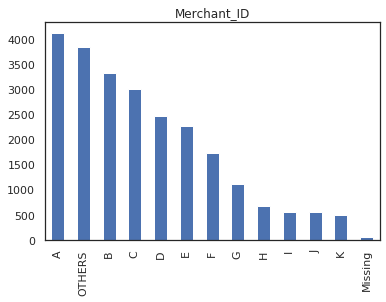

In [34]:
serie.plot(kind='bar',title="Merchant_ID")

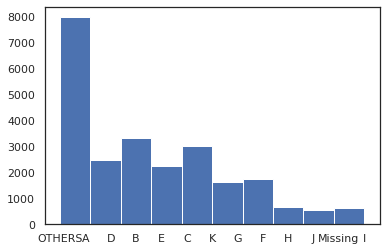

In [35]:
plt.hist(df['MERCHANTID'])
plt.show()

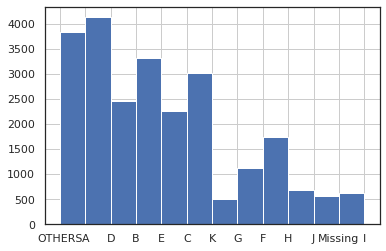

In [36]:
df['MERCHANTID'].hist(bins=12)

([<matplotlib.patches.Wedge at 0x7f2e1c03c240>,
 [Text(0.9463644270850915, 0.5607088113699541, ''),
  Text(0.0034224363190437463, 1.0999946758642254, ''),
  Text(-0.8786220098732789, 0.6618333353392228, ''),
  Text(-1.0830233715260538, -0.1925107184765032, ''),
  Text(-0.6958258878147943, -0.8519544200523603, ''),
  Text(-0.08021222447507693, -1.097071556027573, ''),
  Text(0.4731566633365804, -0.9930371452972915, ''),
  Text(0.7995344350128247, -0.7554764637159277, ''),
  Text(0.9520569841362494, -0.550987748463965, ''),
  Text(1.0278707281460089, -0.39176748999960886, ''),
  Text(1.0735513274508945, -0.2397656091444779, ''),
  Text(1.0962398347004119, -0.09087477546609701, ''),
  Text(1.0999572598521508, -0.009696726176830556, '')])

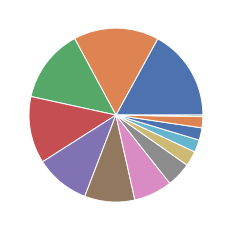

In [37]:
plt.pie(df['MERCHANTID'].value_counts())

#  3 - CurrencyType --> 

In [38]:
df['CURRENCYTYPE'].value_counts()

USD              17403
KHR               5817
99                 186
0                  133
66                 118
THB                 52
 USD                 6
?                    2
VND                  1
$                    1
9000200031318        1
LAK                  1
Name: CURRENCYTYPE, dtype: int64

In [39]:
# df["CURRENCYTYPE"] = df["CURRENCYTYPE"].astype('category')

In [40]:
# df["CURRENCYTYPE"] = df["CURRENCYTYPE"].cat.codes

In [41]:
# plt.hist(df['CURRENCYTYPE'])
# # plt.yscale('linear')
# plt.show()

In [42]:
df['CURRENCYTYPE']=df['CURRENCYTYPE'].replace(to_replace =" USD", 
                 value ="USD")

In [43]:
df['CURRENCYTYPE']=df['CURRENCYTYPE'].replace(to_replace =["?", "$","VND","LAK","9000200031318"],  
                            value ="USD") 

In [44]:
df['CURRENCYTYPE'].unique()

array(['USD', 'KHR', '0', nan, '99', '66', 'THB'], dtype=object)

In [45]:
df['CURRENCYTYPE'].isna().sum()

513

In [46]:
# # will replace  Nan value in dataframe with value -99999  
# df['CURRENCYTYPE']=df.replace(to_replace = np.nan, value ="USD") 

In [47]:
from numpy import nan

In [48]:
df['CURRENCYTYPE']=df['CURRENCYTYPE'].replace(to_replace =nan, 
                 value ="USD")

In [49]:
df['CURRENCYTYPE'].value_counts()

USD    17928
KHR     5817
99       186
0        133
66       118
THB       52
Name: CURRENCYTYPE, dtype: int64

In [50]:
df['CURRENCYTYPE'].isna().sum()

0

In [51]:
df['CURRENCYTYPE']=df['CURRENCYTYPE'].replace(to_replace ="99", 
                 value ="USD")

In [52]:
df['CURRENCYTYPE']=df['CURRENCYTYPE'].replace(to_replace ="0", 
                 value ="KHR")

In [53]:
df['CURRENCYTYPE']=df['CURRENCYTYPE'].replace(to_replace ="66", 
                 value ="THB")

In [54]:
# df["CURRENCYTYPE"]=pd.get_dummies(df, columns=["CURRENCYTYPE"]).head()

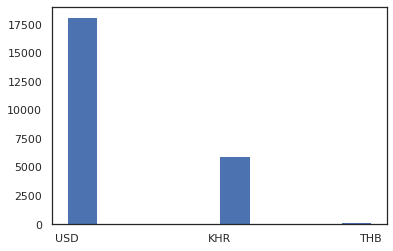

In [55]:
plt.hist(df['CURRENCYTYPE'])
# plt.yscale('linear')
plt.show()

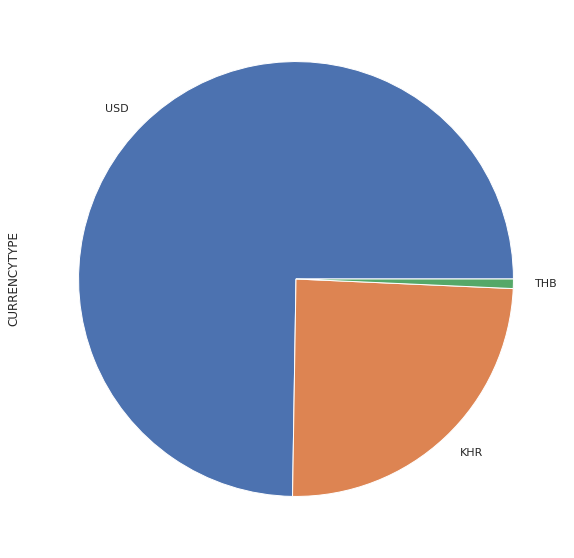

In [56]:
serie = df.loc[:,"CURRENCYTYPE"].value_counts()
serie.plot(kind='pie',figsize=(10,10))

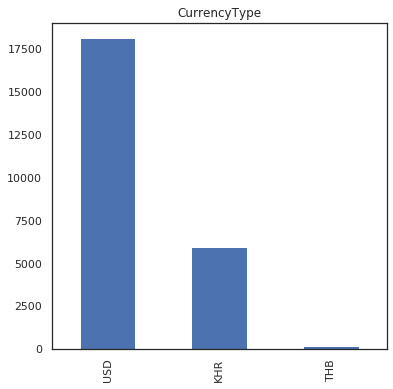

In [57]:
serie.plot(kind='bar',figsize=(6,6),title="CurrencyType")

# 4- AMOUNT

In [58]:
df['AMOUNT'].value_counts()

100.0        3274
1.0          2989
10.0         1726
2.0          1524
270.0        1351
             ... 
7450000.0       1
3100.0          1
9100.0          1
500000.0        1
56.0            1
Name: AMOUNT, Length: 976, dtype: int64

In [59]:
df['AMOUNT'].describe()

count    2.423200e+04
mean     6.323646e+12
std      9.819771e+14
min     -1.000000e+03
25%      2.000000e+00
50%      5.000000e+01
75%      5.000000e+02
max      1.528606e+17
Name: AMOUNT, dtype: float64

In [60]:
# 1.5 * 10^17

# 5- INVOICEID  --> Drop

In [61]:
df['INVOICEID'].value_counts()

1234                                2571
543210                              1451
421386546                            683
0                                    594
20170220                             569
                                    ... 
1322484                                1
6d5eebfdce2d6bc6700b84960c3047b2       1
6343236                                1
20180821111658-20348                   1
1537260704394                          1
Name: INVOICEID, Length: 10975, dtype: int64

In [62]:
df['INVOICEID'].isna().sum()

880

In [63]:
df=df.drop(labels="INVOICEID",axis=1)

# TransactiobnID DROP

In [64]:
df['TRANSACTIONID'].describe()

count     23333
unique    12798
top        1111
freq       2423
Name: TRANSACTIONID, dtype: object

In [65]:
df['TRANSACTIONID'].value_counts()

1111                     2423
12345                    1223
2016110213557346          334
56                        197
1234                      173
                         ... 
1502370665769               1
1499932713453               1
2208200023                  1
1.70725115420957E+017       1
1498711010979               1
Name: TRANSACTIONID, Length: 12798, dtype: int64

In [66]:
df=df.drop(labels="TRANSACTIONID",axis=1)

In [67]:
#############droping as of no use

# 6- DESCRIPTION --> (NO use)

In [68]:
df['DESCRIPTION'].value_counts()

1@Motorola156        2876
1@Motorola X Play    2070
1@coobillClient      1443
0@0                  1293
1@TAXGDT             1083
                     ... 
1@B24(UPpe8Paj)         1
1@B24(tRRSvWwZ)         1
1@B24(qt0JuCvp)         1
1@PNH202018I1           1
1@B24(FUThhM0A)         1
Name: DESCRIPTION, Length: 691, dtype: int64

In [69]:
df['DESCRIPTION'].isna().sum()

138

In [70]:
df=df.drop(labels="DESCRIPTION",axis=1)

# 7- Payment option

In [71]:
df['PAYMENTOPTION'].value_counts()

1       10555
2        5201
1.0      4147
2.0      3252
0         263
4.0       261
4         157
3.0       149
3         138
-1.0       34
0.0         6
KHR         1
Name: PAYMENTOPTION, dtype: int64

In [72]:
df['PAYMENTOPTION']=df['PAYMENTOPTION'].replace(to_replace=2.0,
                                               value="2")

In [73]:
df['PAYMENTOPTION']=df['PAYMENTOPTION'].replace(to_replace=4.0,
                                               value="4")

In [74]:
df['PAYMENTOPTION']=df['PAYMENTOPTION'].replace(to_replace=3.0,
                                               value="3")

In [75]:
df['PAYMENTOPTION']=df['PAYMENTOPTION'].replace(to_replace=1.0,
                                               value="1")

In [76]:
df['PAYMENTOPTION']=df['PAYMENTOPTION'].replace(to_replace=0.0,
                                               value="0")

In [77]:
df['PAYMENTOPTION']=df['PAYMENTOPTION'].replace(to_replace="KHR",
                                               value="1")

In [78]:
# df['PAYMENTOPTION']=df['PAYMENTOPTION'].replace(to_replace="KHR",
#                                                value=1)

In [79]:
# df['PAYMENTOPTION']=df['PAYMENTOPTION'].replace(to_replace=1,
#                                                value="1")

In [80]:
serie = df['PAYMENTOPTION'].value_counts()

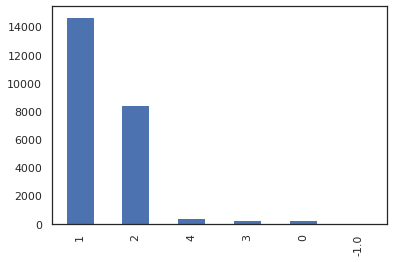

In [81]:
serie.plot(kind='bar')

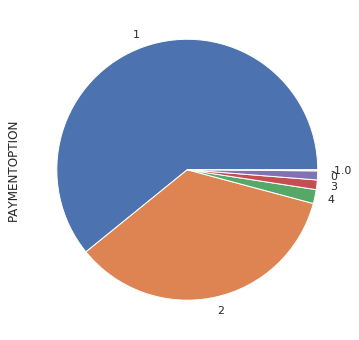

In [82]:
serie.plot(kind='pie',figsize=(6,6))

# 8-> PAYMENTOPTIONDESC (device info)

In [83]:
df['PAYMENTOPTIONDESC'].value_counts()

1@Motorola156        2506
1@Motorola X Play    1727
1@coobillClient      1225
mobile               1120
1@TAXGDT             1063
                     ... 
1@B24(XQc9o6no)         1
1@B24(OGS2eKNV)         1
1@B24(sQCtX69M)         1
1@B24(rYvxBbGe)         1
1@B24(EYQlhWMr)         1
Name: PAYMENTOPTIONDESC, Length: 763, dtype: int64

In [84]:
df['PAYMENTOPTIONDESC'].nunique()

763

In [85]:
df['PAYMENTOPTIONDESC'].isna().sum()

1361

In [86]:
df=df.drop(labels="PAYMENTOPTIONDESC",axis=1)

# 9- INITIALURL

In [87]:
df['INITIALURL'].value_counts()

https://www.registeredurl.com/                                 2004
test                                                           1240
?                                                               750
http://pay.dev/?p=success                                       263
EXPIRED                                                         113
SUCCESS                                                          95
http://pay.dev/page/apayment_success                             90
http://192.168.2.111:8080/gdtpaymentadptweb/test                 68
CANCEL                                                           55
https://api-dev.oneepay.com                                      54
http://booking-online.dev/web/apayment_success                   20
http://ecommerce.angkorhotnews.com/item/eapayment_success        19
http://bayonpay.angkorhotnews.com/page/apayment_success          17
http://angkorstores-dev/item/eapayment_success                   17
http://transport.angkorhotnews.com/payment/apaym

In [88]:
df=df.drop(labels="INITIALURL",axis=1)

# 9- ACCTYPE

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24234 entries, 0 to 24233
Data columns (total 33 columns):
MERCHANTID                   24234 non-null object
CURRENCYTYPE                 24234 non-null object
AMOUNT                       24232 non-null float64
PAYMENTOPTION                24164 non-null object
ACCTYPE                      23724 non-null object
AUTHRESULT                   23765 non-null object
EXPIRYTIME                   23665 non-null float64
IPADDRESS                    9050 non-null object
USERID                       9688 non-null object
TRANSACTIONRESULT            23614 non-null object
AMOUNTDEDUCTED               23764 non-null float64
TRANSACTIONTIME              23596 non-null object
ERRORMESSAGE                 18645 non-null object
CALLBACKRESULT               9531 non-null object
CLOSESTATUS                  23663 non-null object
ACCOUNTNO                    5380 non-null object
ACCOUNTNOOFMERCHANTORBANK    5225 non-null float64
TRANSCREFNUM             

In [90]:
df['ACCTYPE'].value_counts()

2                   11652
1.0                  4375
1                    4000
2.0                  3474
SUCCESS                95
                    ...  
2018090322339905        1
2018082014043778        1
2018090415286506        1
2018092011359847        1
2018092710264340        1
Name: ACCTYPE, Length: 79, dtype: int64

In [91]:
df['ACCTYPE']= df['ACCTYPE'].replace(to_replace=2.0,value="2")

In [92]:
df['ACCTYPE']= df['ACCTYPE'].replace(to_replace=1.0,value="1")

In [93]:
for i in range(len(df)) :
    if(df.iloc[i, 4] != "1"):
        df.iloc[i, 4]="2"
       # print(df.iloc[i, 4]) 

In [94]:
df['ACCTYPE'].value_counts()

2    15859
1     8375
Name: ACCTYPE, dtype: int64

In [95]:
df['ACCTYPE'].isna().sum()

0

In [96]:
df['ACCTYPE'].count()

24234

In [97]:
23724-15126

8598

In [98]:
for ind, column in enumerate(df.columns):
    print(ind, column)

0 MERCHANTID
1 CURRENCYTYPE
2 AMOUNT
3 PAYMENTOPTION
4 ACCTYPE
5 AUTHRESULT
6 EXPIRYTIME
7 IPADDRESS
8 USERID
9 TRANSACTIONRESULT
10 AMOUNTDEDUCTED
11 TRANSACTIONTIME
12 ERRORMESSAGE
13 CALLBACKRESULT
14 CLOSESTATUS
15 ACCOUNTNO
16 ACCOUNTNOOFMERCHANTORBANK
17 TRANSCREFNUM
18 FEECURRENCY
19 FEEAMOUNT
20 CREDITCURRENCYTYPE
21 FEETYPE
22 EXCHANGERATE
23 COREREFNO
24 RESERVE1
25 RESERVE2
26 TXMERCHANTACCOUNT
27 TXDIRECTION
28 IBUSERID
29 FAILEDREASON
30 MINISTERY_TYPE
31 MINISTERY_STATUS
32 MINISTERY_RESPONSE


In [99]:
serie=df['ACCTYPE'].value_counts()

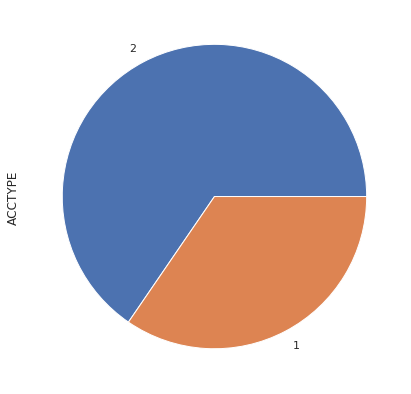

In [100]:
serie.plot(kind='pie',figsize=(7,7))

# 10- EXPIRYTIME (drop)

In [101]:
df['EXPIRYTIME'].value_counts()

 5.000000e+00    15942
 3.000000e+00     3972
 1.000000e+00     1207
 0.000000e+00      940
 1.000000e+01      718
 3.000000e+01      223
 2.000000e+00      142
 1.500000e+01      127
 8.000000e+01      110
 4.310000e+02       76
 4.150000e+02       50
 6.000000e+01       33
 1.022141e+10       23
 6.000000e+00       22
 3.801015e+13       14
 3.411004e+13       11
 1.022141e+10        9
 3.411002e+13        9
 1.022141e+10        7
 8.000000e+00        6
 3.801022e+13        3
 1.020521e+10        2
 1.018962e+10        2
 3.411022e+13        2
 3.411006e+13        2
 1.018962e+10        2
 3.411019e+13        1
 3.411019e+13        1
 1.018962e+10        1
 1.022142e+10        1
 3.446019e+13        1
-2.000000e+00        1
-1.000000e+00        1
 3.411019e+13        1
 1.022141e+10        1
 3.487019e+13        1
 1.086982e+10        1
Name: EXPIRYTIME, dtype: int64

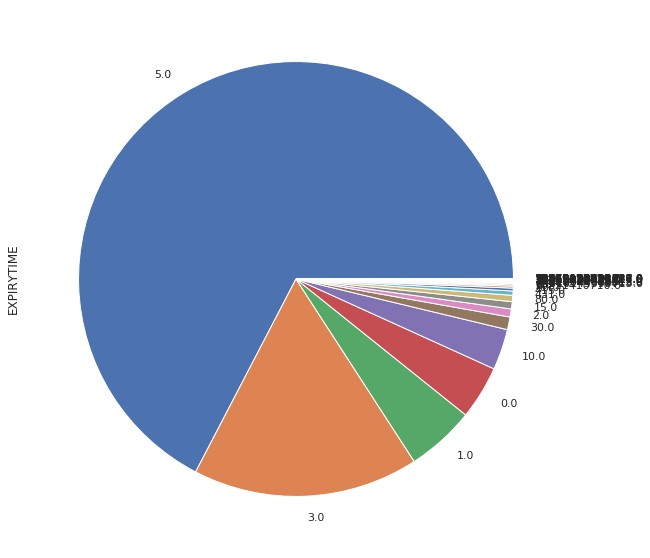

In [102]:
serie=df['EXPIRYTIME'].value_counts()
serie.plot(kind='pie',figsize=(10,10))

In [103]:
df=df.drop(labels="EXPIRYTIME",axis=1)

# 11- AUTHRESULT 

In [104]:
df['AUTHRESULT'].value_counts()

66      6870
99      5551
66.0    3422
0       3231
99.0    2644
0.0     1783
1        168
2         95
USD        1
Name: AUTHRESULT, dtype: int64

In [105]:
df['AUTHRESULT']=df['AUTHRESULT'].replace(to_replace="USD",value="66")

In [106]:
df['AUTHRESULT']=df['AUTHRESULT'].replace(to_replace=66.0,value="66")

In [107]:
df['AUTHRESULT']=df['AUTHRESULT'].replace(to_replace=99.0,value="99")

In [108]:
df['AUTHRESULT']=df['AUTHRESULT'].replace(to_replace="99",value="66") #amol sir

In [109]:
df['AUTHRESULT']=df['AUTHRESULT'].replace(to_replace=0.0,value="0")

In [110]:
df['AUTHRESULT']=df['AUTHRESULT'].replace(to_replace="1",value="0")

In [111]:
df['AUTHRESULT']=df['AUTHRESULT'].replace(to_replace="2",value="0")

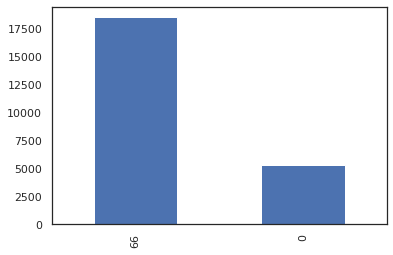

In [112]:
serie=df['AUTHRESULT'].value_counts()
serie.plot(kind='bar')

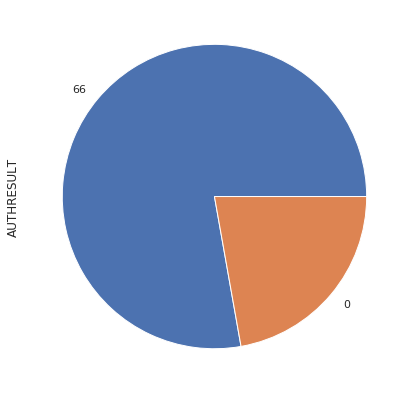

In [113]:
serie.plot(kind='pie',figsize=(7,7))

# IPADDRESS

In [114]:
df['IPADDRESS'].value_counts()

10.100.0.147      1836
189.10.20.1       1444
110.74.222.47     1091
96.9.80.29         619
192.168.1.203      556
                  ... 
117.20.115.159       1
117.20.117.70        1
211.25.207.22        1
115.178.26.235       1
175.100.20.226       1
Name: IPADDRESS, Length: 148, dtype: int64

In [115]:
df=df.drop(labels="IPADDRESS",axis=1)

# USERID

In [116]:
df['USERID'].value_counts()

10077777710         730
34110216972414      712
10171042617         632
13017405217         431
10056575810         412
                   ... 
553555656663665       1
10011445521           1
555666                1
2018071609357896      1
12457889564447        1
Name: USERID, Length: 952, dtype: int64

In [117]:
df=df.drop(labels="USERID",axis=1)

# 12- TRANSACTIONRESULT

In [118]:
df['TRANSACTIONRESULT'].value_counts()

66                                  6870
99                                  5551
66.0                                3422
0                                   3237
99.0                                2644
0.0                                 1783
-256                                  38
USD                                   21
1                                     19
KHR                                   13
THB                                   10
-99                                    2
-1                                     1
XPAYtR7bvK5EkZr2FQbiDq6ck3drz8E=       1
-257                                   1
-253                                   1
Name: TRANSACTIONRESULT, dtype: int64

In [119]:
# for i in range(len(df)) :
#     if(df.iloc[i, 6] == "66"):
# #         df.iloc[i, 5]="2"
#         print(df.iloc[i, 6]) 

In [120]:
df['TRANSACTIONRESULT']=df['TRANSACTIONRESULT'].replace(to_replace=66.0,
                                                       value="66")

In [121]:
df['TRANSACTIONRESULT']=df['TRANSACTIONRESULT'].replace(to_replace=99.0,
                                                       value="99")

In [122]:
df['TRANSACTIONRESULT']=df['TRANSACTIONRESULT'].replace(to_replace=0.0,
                                                       value="0")

In [123]:
for i in range(len(df)) : 
    if(df.iloc[i, 6] != "66" and df.iloc[i, 6] != "99" and df.iloc[i, 6] != "0" ):
       # print(df.iloc[i, 6])
        df.iloc[i, 6] = "66"
        

In [124]:
df['TRANSACTIONRESULT']=df['TRANSACTIONRESULT'].replace(to_replace="99",
                                                       value="66")

In [125]:
serie=df['TRANSACTIONRESULT'].value_counts()

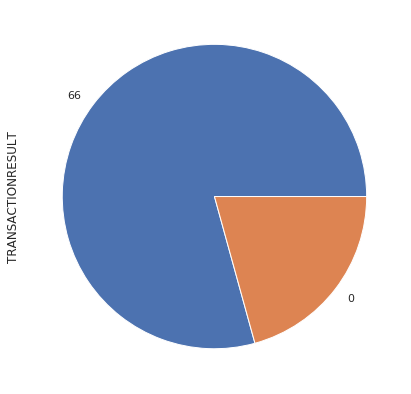

In [126]:
serie.plot(kind='pie',figsize=(7,7))

# 13- AMOUNTDEDUCTED

In [127]:
df['AMOUNTDEDUCTED'].value_counts()

0.0       23720
1.0          21
4100.0       13
32.0          5
33.0          4
34.0          1
Name: AMOUNTDEDUCTED, dtype: int64

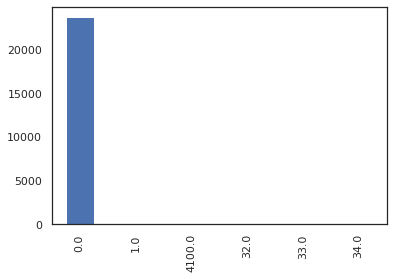

In [128]:
serie=df['AMOUNTDEDUCTED'].value_counts()
serie.plot(kind='bar')

In [129]:
df=df.drop(labels="AMOUNTDEDUCTED",axis=1)

In [130]:
##########dropping as of no use

# 14 - TRANSACTIONTIME

In [131]:
df['TRANSACTIONTIME'].value_counts()

14-JUL-17    354
17-JUL-17    345
26-APR-18    316
07-JUN-17    292
12-MAR-18    281
            ... 
29-OCT-17      1
28-MAR-19      1
29-APR-18      1
10-JAN-18      1
22-APR-18      1
Name: TRANSACTIONTIME, Length: 496, dtype: int64

In [132]:
#first date---  14 jul 2017
#last daet --- 28 march 2019

In [133]:
df=df.drop(labels="TRANSACTIONTIME",axis=1)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24234 entries, 0 to 24233
Data columns (total 28 columns):
MERCHANTID                   24234 non-null object
CURRENCYTYPE                 24234 non-null object
AMOUNT                       24232 non-null float64
PAYMENTOPTION                24164 non-null object
ACCTYPE                      24234 non-null object
AUTHRESULT                   23765 non-null object
TRANSACTIONRESULT            24234 non-null object
ERRORMESSAGE                 18645 non-null object
CALLBACKRESULT               9531 non-null object
CLOSESTATUS                  23663 non-null object
ACCOUNTNO                    5380 non-null object
ACCOUNTNOOFMERCHANTORBANK    5225 non-null float64
TRANSCREFNUM                 23228 non-null float64
FEECURRENCY                  4826 non-null object
FEEAMOUNT                    23364 non-null object
CREDITCURRENCYTYPE           5284 non-null object
FEETYPE                      23228 non-null float64
EXCHANGERATE             

# 15- ERRORMESSAGE

In [135]:
df['ERRORMESSAGE'].value_counts()

SUCCESS        4950
CANCELLED      3882
EXPIRED        3788
Not Checked    3348
CANCEL         1623
PENDING         720
0               168
2                95
FAILED           71
Name: ERRORMESSAGE, dtype: int64

In [136]:
df['ERRORMESSAGE'].isna().sum()

5589

In [137]:
df['ERRORMESSAGE']=df['ERRORMESSAGE'].replace(to_replace="SUCCESS",
                             value=1)


In [138]:
for i in range (len(df)):
#     print(df.iloc[i,6])
    if df.iloc[i,7]!=1:
        df.iloc[i,7]=0
#         print(df.iloc[i,7])

In [139]:
df['ERRORMESSAGE'].count()

24234

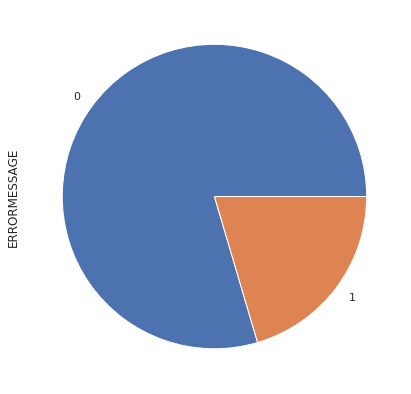

In [140]:
serie=df['ERRORMESSAGE'].value_counts()
serie.plot(kind='pie',figsize=(7,7))

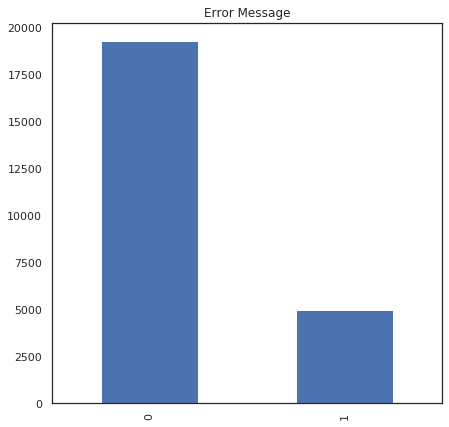

In [141]:
serie.plot(kind='bar',figsize=(7,7),title="Error Message")

# 16- CALLBACKRESULT

In [142]:
df['CALLBACKRESULT'].value_counts()

SUCCESS                                                                                                  4950
One Time Password is sent to your registered mobile number. </br> Please check your mobile.              1688
You have mobile one time password security token assigned.</br> please use that for generating OTP.       669
ERROR                                                                                                     428
User Identified Successfully                                                                              422
Invalid Attempts exceed                                                                                   361
Sorry                                                                                                     272
0                                                                                                         239
Internal Server Error::Core System Is Unreachable!                                                        200
success   

In [143]:
df=df.drop(labels="CALLBACKRESULT",axis=1)

# 17- CLOSESTATUS

In [144]:
df['CLOSESTATUS'].value_counts()

1                                                                                            18215
2                                                                                             4952
 One Time Password could not be sent. </br> Please click on Resend New OTP to get new OTP      272
0                                                                                               68
-1                                                                                              61
                                                                                             ...  
FT181990RCSK5W5M                                                                                 1
FT182110T0DD611S                                                                                 1
FT1824007GKTSVYY                                                                                 1
FT181970RCSKHY4L                                                                                 1
FT182610LL

In [145]:
df['CLOSESTATUS'].count

<bound method Series.count of 0          1
1          1
2          1
3          1
4          2
        ... 
24229      1
24230      1
24231      1
24232      1
24233    NaN
Name: CLOSESTATUS, Length: 24234, dtype: object>

In [146]:


df['CLOSESTATUS']=df['CLOSESTATUS'].replace(to_replace=" One Time Password could not be sent. </br> Please click on Resend New OTP to get new OTP",
                                                       value="Resend_OTP")

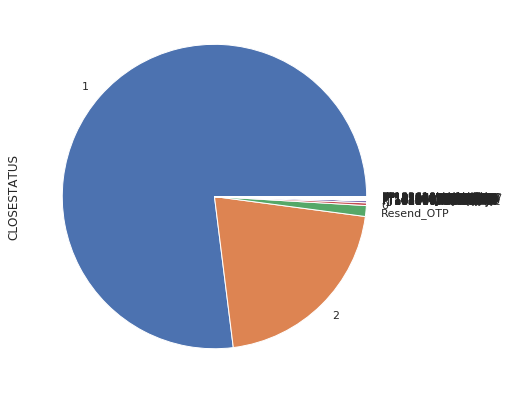

In [147]:
serie=df['CLOSESTATUS'].value_counts()
serie.plot(kind='pie',figsize=(7,7))

In [148]:
df=df.drop(labels="CLOSESTATUS",axis=1)

In [149]:
# serie.plot(kind='bar',figsize=(7,7))
# df['CLOSESTATUS'].hist(bins=2)

# ACCNO

In [150]:
df['ACCOUNTNO'].value_counts()

10869824211       521
9000869822011     261
10077777710.0     212
34110216972414    192
1.0               190
                 ... 
10015151111         1
34870189624631      1
10221410715.0       1
10011445521         1
10015151516         1
Name: ACCOUNTNO, Length: 278, dtype: int64

In [151]:
df=df.drop(labels="ACCOUNTNO",axis=1)

# ACCOUNTNOOFMERCHANTORBANK

In [152]:
df=df.drop(labels="ACCOUNTNOOFMERCHANTORBANK",axis=1)

# TRANSCREFNUM

In [153]:
df['TRANSCREFNUM'].value_counts()

2.018061e+15    1
2.018092e+15    1
2.017071e+15    1
2.018013e+15    1
2.018031e+15    1
               ..
2.018063e+15    1
2.017071e+15    1
2.017063e+14    1
2.018110e+15    1
2.017111e+15    1
Name: TRANSCREFNUM, Length: 23228, dtype: int64

In [154]:
df=df.drop(labels="TRANSCREFNUM",axis=1)

# 18- FEECURRENCY 

In [155]:
df['FEECURRENCY'].value_counts()

USD                 3149
KHR                  887
0                    263
THB                  255
2017071910594651       1
                    ... 
201706051843929        1
201806071043331        1
2017121919513229       1
2017102716022447       1
201805241421621        1
Name: FEECURRENCY, Length: 276, dtype: int64

In [156]:
df['FEECURRENCY']=df['FEECURRENCY'].replace(to_replace="0",
                                           value="KHR")

In [157]:
# df.info()

In [158]:
for i in range(len(df)):
    #print(df.iloc[i,8])
    if (df.iloc[i,8] != "USD" and df.iloc[i,8] != "KHR" and df.iloc[i,8] != "THB"):
        df.iloc[i,8]="others"

In [159]:
df['FEECURRENCY'].isna().sum()

0

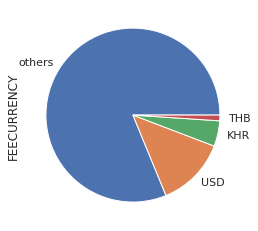

In [160]:
serie=df['FEECURRENCY'].value_counts()
serie.plot(kind='pie')

In [161]:
# serie.plot(kind='bar')

In [162]:
df=df.drop(labels="FEECURRENCY",axis=1)

In [163]:
# # Iterate over two given columns only from the dataframe
# for column in df[['FEECURRENCY']]:
#     columnSeriesObj = df[column]
#     if(columnSeriesObj=="USD"):
#         print('Column Contents : ', columnSeriesObj.values)
#    # Select column contents by column name using [] operator
   
    
# #    print('Colunm Name : ', column)

   

In [164]:

# # Iterate over the sequence of column names
# for column in df:
#    # Select column contents by column name using [] operator
#     columnSeriesObj = df['FEECURRENCY']
#     print('Colunm Name : ', column)
#     print('Column Contents : ', columnSeriesObj.values)

# 19- FEEAMOUNT

In [165]:
df['FEEAMOUNT'].value_counts()

0          12731
0.0         6215
0.25        1139
0.5          669
0.5          510
           ...  
10000.0        1
1400           1
0.48           1
0.89           1
0.81           1
Name: FEEAMOUNT, Length: 77, dtype: int64

In [166]:
df['FEEAMOUNT'].count()

23364

In [167]:
df=df.drop(labels="FEEAMOUNT",axis=1)

# 20- CREDITCURRENCYTYPE

In [168]:
df['CREDITCURRENCYTYPE'].value_counts()

USD    3401
KHR    1556
0       272
THB      55
Name: CREDITCURRENCYTYPE, dtype: int64

In [169]:
df['CREDITCURRENCYTYPE'].count()

5284

In [170]:
df['CREDITCURRENCYTYPE'].isna().sum()

18950

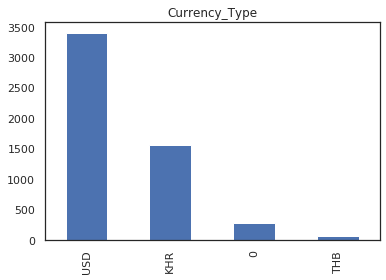

In [171]:
serie=df['CREDITCURRENCYTYPE'].value_counts()
serie.plot(kind='bar',title="Currency_Type")

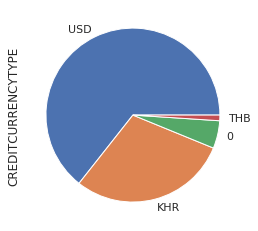

In [172]:
serie.plot(kind='pie')

In [173]:
df=df.drop(labels="CREDITCURRENCYTYPE",axis=1)

# 21- FEETYPE

In [174]:
df['FEETYPE'].value_counts()

0.0    18215
2.0     4730
1.0      283
Name: FEETYPE, dtype: int64

In [175]:
df['FEETYPE'].count()

23228

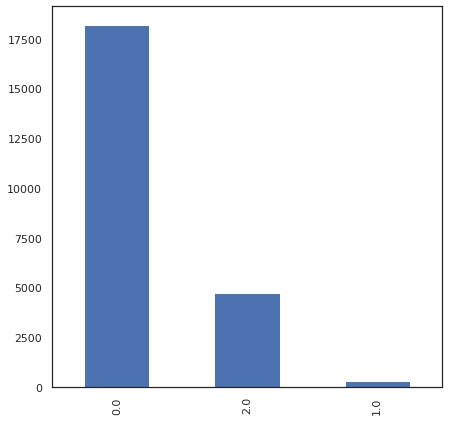

In [176]:
serie=df['FEETYPE'].value_counts()
serie.plot(kind='bar',figsize=(7,7))

# EXCHANGERATE

In [177]:
df['EXCHANGERATE'].value_counts()

0.0000       21386
4096.0000      205
4039.0000      196
4110.0000      182
4084.0000      160
4101.0000      130
34.1591        112
4006.0000      109
4031.0000      107
4088.0000       91
4058.0000       90
4095.0000       88
4074.0000       57
4045.0000       51
4042.0000       50
4065.0000       46
4021.0000       43
120.1000        34
4049.0000       33
4004.0000       31
4020.0000       29
4044.0000       25
34.6459         22
122.7000        22
32.7188         16
31.8828         15
32.2864         14
4080.0000       11
4026.0000       10
4052.0000       10
4050.0000        9
31.6273          8
32.5119          8
32.2447          8
115.8000         7
32.8250          7
33.3457          7
121.5000         6
124.6000         6
4100.0000        6
127.2000         6
33.3237          5
4500.0000        4
34.1511          4
33.0644          4
34.1500          4
4001.0000        3
31.8396          3
40.1001          3
125.8000         2
32.8251          2
121.4000         2
126.4000    

# COREREFNO

In [178]:
df['COREREFNO'].value_counts()

0                   272
FT180330PPXD21W9      1
FT171790WXSJSSBL      1
FT173540FBF2KC41      1
FT171940PTTKZ4NN      1
                   ... 
FT173330T0KDF0N4      1
FT1811602XX94B73      1
FT173550TKDBCJ82      1
FT1905605XYR7KRY      1
FT182060RCSK3FF7      1
Name: COREREFNO, Length: 4972, dtype: int64

In [179]:
df=df.drop(labels="COREREFNO",axis=1)

# 22- RESERVE1

In [180]:
df['RESERVE1'].value_counts()

USD    3506
KHR    1203
THB     298
?         1
Name: RESERVE1, dtype: int64

In [181]:
df['RESERVE1'].isna().sum()

19226

In [182]:
df['RESERVE1'].count()

5008

In [183]:
df['RESERVE1']=df['RESERVE1'].replace(to_replace="?",value="USD")

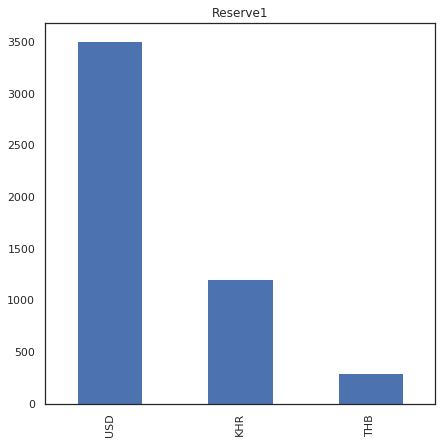

In [184]:
serie=df['RESERVE1'].value_counts()
serie.plot(kind='bar',figsize=(7,7),title="Reserve1")

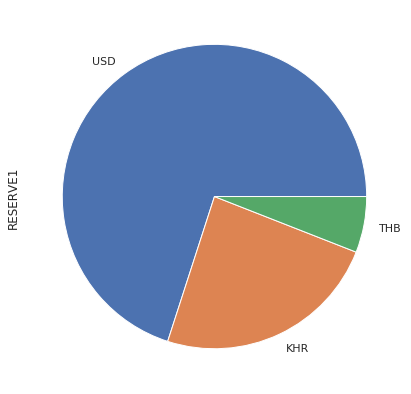

In [185]:
serie.plot(kind='pie',figsize=(7,7))

In [186]:
df=df.drop(labels="RESERVE1",axis=1)

# 23- RESERVE2

In [187]:
df['RESERVE2'].value_counts()

0.0    13790
3.0     1058
1.5       99
2.5       86
Name: RESERVE2, dtype: int64

In [188]:
df['RESERVE2'].count()

15033

In [189]:
df['RESERVE2'].isna().sum()

9201

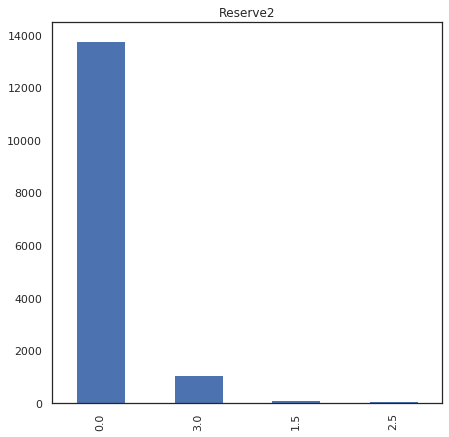

In [190]:
serie=df['RESERVE2'].value_counts()
serie.plot(kind='bar',figsize=(7,7),title="Reserve2")

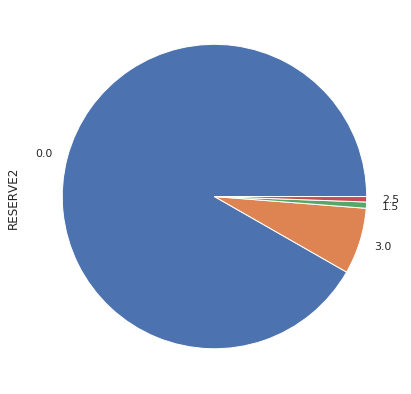

In [191]:
serie.plot(kind='pie',figsize=(7,7))

In [192]:
df=df.drop(labels="RESERVE2",axis=1)

# 24- TXDIRECTION

In [193]:
df['TXDIRECTION'].value_counts()

0.000000e+00    14696
2.000000e+00     4284
1.000000e+00     4248
1.086982e+10       14
1.022142e+10        9
9.000870e+12        8
1.086982e+10        3
Name: TXDIRECTION, dtype: int64

In [194]:
df['TXDIRECTION'].isna().sum()

972

In [195]:
df['TXDIRECTION']=df['TXDIRECTION'].replace(to_replace=10869821811.0,
                                           value=0)

In [196]:
df['TXDIRECTION']=df['TXDIRECTION'].replace(to_replace=102214217617.0,
                                           value=0)

In [197]:
df['TXDIRECTION']=df['TXDIRECTION'].replace(to_replace=10869821811.0,
                                           value=0)

In [198]:
df['TXDIRECTION']=df['TXDIRECTION'].replace(to_replace=10869821811.0,
                                           value=0)

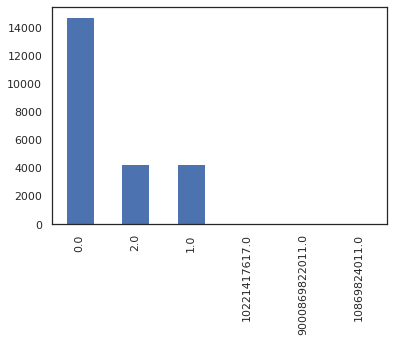

In [199]:
serie=df['TXDIRECTION'].value_counts()
serie.plot(kind='bar')

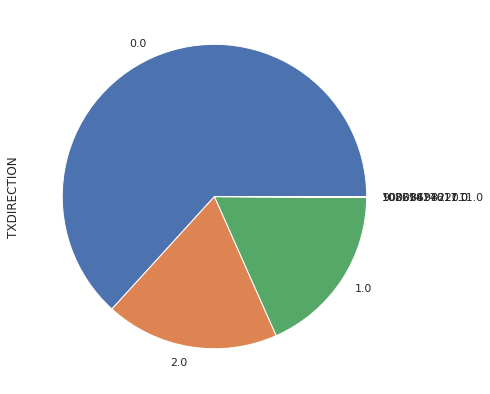

In [200]:
serie.plot(kind='pie',figsize=(7,7))

In [201]:
df=df.drop(labels="TXDIRECTION",axis=1)

# TXMERCHANTACCOUNT

In [202]:
df['TXMERCHANTACCOUNT'].value_counts()

9.000870e+12    2796
1.086982e+10    1434
1.086982e+10    1300
1.022142e+10     899
1.086982e+10     756
1.086982e+10     404
0.000000e+00     247
1.022142e+10     224
1.086982e+10     197
1.086982e+10     152
1.022142e+10     135
1.086982e+10      83
1.086982e+10      42
1.086982e+10      29
1.022142e+10      29
3.000000e+00      25
1.086982e+10      23
1.086982e+10       9
1.022142e+10       9
1.022142e+10       5
1.086982e+10       3
1.086982e+10       2
1.022142e+10       1
Name: TXMERCHANTACCOUNT, dtype: int64

In [203]:
df=df.drop(labels="TXMERCHANTACCOUNT",axis=1)

# IBUSERID

In [204]:
df['IBUSERID'].value_counts()

XPAYgPDou+QimlTHqp/bJk3yb+9g6xU=            552
XPAYd/WM6yzuDGD05YQ6ExZsOKbelys=            457
XPAYpYttBoM8wRpxoNWQZqzqM0jxKBE=            348
13030a4da302aab0dcbe69f7793bd7fde3360f42    306
XPAYqlcvrEwOh7eO5BKjnD86tQeDVT4=            303
                                           ... 
XPAYtYNSyilLZcbAUQbEN8geiB4C4qg=              1
XPAYlGYZwZoqVmg/UrFc+8+2ti4CYoQ=              1
XPAY4mgXIXMj7Yd71i19m2gtwq0CFTI=              1
XPAYmEcgWON+0Iv7DL1VjLGgFHGfyDA=              1
XPAYySNXyoQRJ+jdRsWhRynuhA0oCf4=              1
Name: IBUSERID, Length: 94, dtype: int64

In [205]:
df=df.drop(labels="IBUSERID",axis=1)

# 25- FAILEDREASON

In [206]:
df['FAILEDREASON'].value_counts()

CashOut Total Transaction per Day is higher than permitted Limit of Transaction.!!!       38
13030a4da302aab0dcbe69f7793bd7fde3360f42                                                  26
MOPHYNA                                                                                   20
XPAYjYFJeU8xgXPvLC5gO98MJaHiVdQ=                                                          11
XPAYpYttBoM8wRpxoNWQZqzqM0jxKBE=                                                           8
Wrong Attempts Limit Exceeded ...!!!                                                       7
CHARGE.AMT:1:1=EB-MISSING.RECORD                                                           5
XPAYgZ78W3ofH8AU2inBztEp/P/A96I=                                                           4
XPAYqlcvrEwOh7eO5BKjnD86tQeDVT4=                                                           4
Unauthorised overdraft of USD 15.27 on account 34730011130518.                             4
XPAYtYNSyilLZcbAUQbEN8geiB4C4qg=                                      

In [207]:
df['FAILEDREASON'].nunique()

34

In [208]:
df['FAILEDREASON'].isna().sum()

24067

In [209]:
df=df.drop(labels="FAILEDREASON",axis=1)

# 26- MINISTERY_TYPE

In [210]:
df['MINISTERY_TYPE'].value_counts()

0.0    1172
Name: MINISTERY_TYPE, dtype: int64

In [211]:
df['MINISTERY_TYPE'].isna().sum()

23062

# 27- MINISTERY_STATUS

In [212]:
df['MINISTERY_STATUS'].value_counts()

0.0    1174
Name: MINISTERY_STATUS, dtype: int64

In [213]:
df['MINISTERY_STATUS'].isna().sum()

23060

# 28- MINISTERY_RESPONSE

In [214]:
df['MINISTERY_RESPONSE'].value_counts()

0.0    1
Name: MINISTERY_RESPONSE, dtype: int64

In [215]:
df['MINISTERY_RESPONSE'].isna().sum()

24233

In [216]:
df=df.drop(labels="MINISTERY_TYPE",axis=1)
df=df.drop(labels="MINISTERY_STATUS",axis=1)
df=df.drop(labels="MINISTERY_RESPONSE",axis=1)

# --------------------------------------------------------------------------
# --------------------------------------------------------------------------

In [217]:
for ind, column in enumerate(df.columns):
    print(ind, column)

0 MERCHANTID
1 CURRENCYTYPE
2 AMOUNT
3 PAYMENTOPTION
4 ACCTYPE
5 AUTHRESULT
6 TRANSACTIONRESULT
7 ERRORMESSAGE
8 FEETYPE
9 EXCHANGERATE


In [218]:
df['MERCHANTID'].value_counts()

A          4126
OTHERS     3841
B          3320
C          3017
D          2460
E          2260
F          1733
G          1114
H           679
I           559
J           555
K           502
Missing      68
Name: MERCHANTID, dtype: int64

In [219]:
df['MERCHANTID'].isna().sum()

0

In [220]:
df['CURRENCYTYPE'].value_counts()

USD    18114
KHR     5950
THB      170
Name: CURRENCYTYPE, dtype: int64

In [221]:
df['CURRENCYTYPE'].isna().sum()

0

In [222]:

df['AMOUNT'].value_counts()

100.0        3274
1.0          2989
10.0         1726
2.0          1524
270.0        1351
             ... 
7450000.0       1
3100.0          1
9100.0          1
500000.0        1
56.0            1
Name: AMOUNT, Length: 976, dtype: int64

In [223]:
df['AMOUNT']=df['AMOUNT'].replace(to_replace=nan,value=0)

In [224]:
df['AMOUNT'].isna().sum()

0

In [225]:
df['PAYMENTOPTION'].value_counts()

1       14703
2        8453
4         418
3         287
0         269
-1.0       34
Name: PAYMENTOPTION, dtype: int64

In [226]:
df['PAYMENTOPTION']=df['PAYMENTOPTION'].replace(to_replace=nan,value=-1)

In [227]:
df['PAYMENTOPTION'].isna().sum()

0

In [228]:

df['ACCTYPE'].value_counts()

2    15859
1     8375
Name: ACCTYPE, dtype: int64

In [229]:
df['ACCTYPE'].isna().sum()

0

In [230]:
df['AUTHRESULT'].value_counts()

66    18488
0      5277
Name: AUTHRESULT, dtype: int64

In [231]:
df['AUTHRESULT']=df['AUTHRESULT'].replace(to_replace=nan,value=-1)
# df['AUTHRESULT']=df['AUTHRESULT'].replace(to_replace=66,value="66")

In [232]:
df['AUTHRESULT'].isna().sum()

0

In [233]:
df['AUTHRESULT']=df['AUTHRESULT'].replace(to_replace="66",value=-1)
df['AUTHRESULT']=df['AUTHRESULT'].replace(to_replace="0",value=1)

In [234]:

df['TRANSACTIONRESULT'].value_counts()

66    19214
0      5020
Name: TRANSACTIONRESULT, dtype: int64

In [235]:

df['TRANSACTIONRESULT'].isna().sum()

0

In [236]:

df['ERRORMESSAGE'].value_counts()

0    19284
1     4950
Name: ERRORMESSAGE, dtype: int64

In [237]:

df['ERRORMESSAGE'].isna().sum()

0

In [238]:

df['FEETYPE'].value_counts()


0.0    18215
2.0     4730
1.0      283
Name: FEETYPE, dtype: int64

In [239]:
df['FEETYPE']=df['FEETYPE'].replace(to_replace=nan,value=0)
df['FEETYPE'].isna().sum()

0

In [240]:



df['EXCHANGERATE'].value_counts()


0.0000       21386
4096.0000      205
4039.0000      196
4110.0000      182
4084.0000      160
4101.0000      130
34.1591        112
4006.0000      109
4031.0000      107
4088.0000       91
4058.0000       90
4095.0000       88
4074.0000       57
4045.0000       51
4042.0000       50
4065.0000       46
4021.0000       43
120.1000        34
4049.0000       33
4004.0000       31
4020.0000       29
4044.0000       25
34.6459         22
122.7000        22
32.7188         16
31.8828         15
32.2864         14
4080.0000       11
4026.0000       10
4052.0000       10
4050.0000        9
31.6273          8
32.5119          8
32.2447          8
115.8000         7
32.8250          7
33.3457          7
121.5000         6
124.6000         6
4100.0000        6
127.2000         6
33.3237          5
4500.0000        4
34.1511          4
33.0644          4
34.1500          4
4001.0000        3
31.8396          3
40.1001          3
125.8000         2
32.8251          2
121.4000         2
126.4000    

In [241]:
df['EXCHANGERATE']=df['EXCHANGERATE'].replace(to_replace=nan,value=0)
df['EXCHANGERATE'].isna().sum()

0

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24234 entries, 0 to 24233
Data columns (total 10 columns):
MERCHANTID           24234 non-null object
CURRENCYTYPE         24234 non-null object
AMOUNT               24234 non-null float64
PAYMENTOPTION        24234 non-null object
ACCTYPE              24234 non-null object
AUTHRESULT           24234 non-null int64
TRANSACTIONRESULT    24234 non-null object
ERRORMESSAGE         24234 non-null int64
FEETYPE              24234 non-null float64
EXCHANGERATE         24234 non-null float64
dtypes: float64(3), int64(2), object(5)
memory usage: 1.8+ MB


In [243]:
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# labelencoder_X = LabelEncoder()

In [244]:
# X[:, 0] = labelencoder_X.fit_transform(X[:, 0])

In [245]:
# onehotencoder = OneHotEncoder(categories = [0])

In [246]:
for ind, column in enumerate(df.columns):
    print(ind, column)

0 MERCHANTID
1 CURRENCYTYPE
2 AMOUNT
3 PAYMENTOPTION
4 ACCTYPE
5 AUTHRESULT
6 TRANSACTIONRESULT
7 ERRORMESSAGE
8 FEETYPE
9 EXCHANGERATE


In [247]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["MERCHANTID"] = le.fit_transform(df["MERCHANTID"])

In [248]:
df['MERCHANTID'].value_counts()

0     4126
12    3841
1     3320
2     3017
3     2460
4     2260
5     1733
6     1114
7      679
8      559
9      555
10     502
11      68
Name: MERCHANTID, dtype: int64

In [249]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer

In [250]:
# X = [[0, 'a'], [0, 'b'], [1, 'a'], [2, 'b']]



In [251]:
# X

In [252]:
# ct = ColumnTransformer(
#     [('one_hot_encoder', OneHotEncoder(categories='auto'), [1])],   # The column numbers to be transformed (here is [0] but can be [0, 1, 3])
#     remainder='passthrough'                                         # Leave the rest of the columns untouched
# )

# X = ct.fit_transform(X)

In [253]:
# X

In [254]:
# ct = ColumnTransformer(
#     [('one_hot_encoder', OneHotEncoder(categories='auto'), [0,1,3,4,6,7,8,9])],   # The column numbers to be transformed (here is [0] but can be [0, 1, 3])
#     remainder='passthrough'                                         # Leave the rest of the columns untouched
# )


In [255]:
# X = ct.fit_transform(df)
# type(X)

In [256]:
# type(y)

In [257]:
df["CURRENCYTYPE"]=le.fit_transform(df["CURRENCYTYPE"])

In [258]:
df['CURRENCYTYPE'].value_counts()

2    18114
0     5950
1      170
Name: CURRENCYTYPE, dtype: int64

In [259]:
df['PAYMENTOPTION'].value_counts()

1     14703
2      8453
4       418
3       287
0       269
-1      104
Name: PAYMENTOPTION, dtype: int64

In [260]:
df["PAYMENTOPTION"]=df["PAYMENTOPTION"].replace(["-1","0","1","2","3","4"],[-1,0,1,2,3,4])

In [261]:
df["ACCTYPE"]=le.fit_transform(df["ACCTYPE"])

In [262]:
df["ACCTYPE"].value_counts()

1    15859
0     8375
Name: ACCTYPE, dtype: int64

In [263]:
# df["AUTHRESULT"]=le.fit_transform(df["AUTHRESULT"])

In [264]:
df["AUTHRESULT"].value_counts()

-1    18957
 1     5277
Name: AUTHRESULT, dtype: int64

In [265]:
df["TRANSACTIONRESULT"]=le.fit_transform(df["TRANSACTIONRESULT"])

In [266]:
df["TRANSACTIONRESULT"].value_counts()

1    19214
0     5020
Name: TRANSACTIONRESULT, dtype: int64

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24234 entries, 0 to 24233
Data columns (total 10 columns):
MERCHANTID           24234 non-null int64
CURRENCYTYPE         24234 non-null int64
AMOUNT               24234 non-null float64
PAYMENTOPTION        24234 non-null int64
ACCTYPE              24234 non-null int64
AUTHRESULT           24234 non-null int64
TRANSACTIONRESULT    24234 non-null int64
ERRORMESSAGE         24234 non-null int64
FEETYPE              24234 non-null float64
EXCHANGERATE         24234 non-null float64
dtypes: float64(3), int64(7)
memory usage: 1.8 MB


In [268]:
for ind, column in enumerate(df.columns):
    print(ind, column)

0 MERCHANTID
1 CURRENCYTYPE
2 AMOUNT
3 PAYMENTOPTION
4 ACCTYPE
5 AUTHRESULT
6 TRANSACTIONRESULT
7 ERRORMESSAGE
8 FEETYPE
9 EXCHANGERATE


In [269]:
# X = dataset.iloc[:, :-1].values
y = df.iloc[:, 5].values

In [270]:
df.isna().any()

MERCHANTID           False
CURRENCYTYPE         False
AMOUNT               False
PAYMENTOPTION        False
ACCTYPE              False
AUTHRESULT           False
TRANSACTIONRESULT    False
ERRORMESSAGE         False
FEETYPE              False
EXCHANGERATE         False
dtype: bool

In [271]:
y.shape

(24234,)

In [287]:
y

array([-1, -1, -1, ..., -1, -1, -1])

In [273]:
y.astype(int)


array([-1, -1, -1, ..., -1, -1, -1])

In [274]:
X= df.iloc[: ,[0,1,2,3,4,6,7,8,9]].values

In [275]:
X.shape

(24234, 9)

In [276]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)




In [277]:
from sklearn.model_selection import KFold




In [278]:
cv = KFold(n_splits=10, random_state=42, shuffle=False)

/home/bhrt/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [279]:
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

Train Index:  [ 2424  2425  2426 ... 24231 24232 24233] 

Test Index:  [   0    1    2 ... 2421 2422 2423]
Train Index:  [    0     1     2 ... 24231 24232 24233] 

Test Index:  [2424 2425 2426 ... 4845 4846 4847]
Train Index:  [    0     1     2 ... 24231 24232 24233] 

Test Index:  [4848 4849 4850 ... 7269 7270 7271]
Train Index:  [    0     1     2 ... 24231 24232 24233] 

Test Index:  [7272 7273 7274 ... 9693 9694 9695]
Train Index:  [    0     1     2 ... 24231 24232 24233] 

Test Index:  [ 9696  9697  9698 ... 12116 12117 12118]
Train Index:  [    0     1     2 ... 24231 24232 24233] 

Test Index:  [12119 12120 12121 ... 14539 14540 14541]
Train Index:  [    0     1     2 ... 24231 24232 24233] 

Test Index:  [14542 14543 14544 ... 16962 16963 16964]
Train Index:  [    0     1     2 ... 24231 24232 24233] 

Test Index:  [16965 16966 16967 ... 19385 19386 19387]
Train Index:  [    0     1     2 ... 24231 24232 24233] 

Test Index:  [19388 19389 19390 ... 21808 21809 21810]
Train I

In [280]:
  X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

In [281]:
y_train

array([-1, -1, -1, ..., -1, -1, -1])

In [282]:
np.unique(y_train)

array([-1,  1])

In [283]:
# # Splitting the dataset into the Training set and Test set
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [284]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
X_test




array([[-1.10406459,  0.56521463, -0.00678786, ...,  1.98612279,
         2.02933388, -0.28239963],
       [-0.36207576, -1.78833562, -0.00678786, ...,  1.98612279,
         2.02933388,  3.57542085],
       [-0.36207576, -1.78833562, -0.00678786, ...,  1.98612279,
         2.02933388,  3.57542085],
       ...,
       [ 1.86389073,  0.56521463, -0.00678786, ..., -0.50349354,
        -0.50302309, -0.28239963],
       [ 1.86389073,  0.56521463, -0.00678786, ..., -0.50349354,
        -0.50302309, -0.28239963],
       [ 1.86389073,  0.56521463, -0.00678786, ..., -0.50349354,
        -0.50302309, -0.28239963]])

In [288]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 1)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [290]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [291]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [292]:
cm

array([[1883,    1],
       [   0,  539]])

In [293]:
from sklearn.metrics import accuracy_score as acc


In [294]:
print(acc(y_test,y_pred))

0.9995872884853487


In [295]:
df

,MERCHANTID,CURRENCYTYPE,AMOUNT,PAYMENTOPTION,ACCTYPE,AUTHRESULT,TRANSACTIONRESULT,ERRORMESSAGE,FEETYPE,EXCHANGERATE
0,12,2,1.00,1,1,-1,1,0,0.0,0.0
1,0,0,100000.00,2,0,-1,1,0,0.0,0.0
2,0,0,100.00,1,0,-1,1,0,0.0,0.0
3,0,0,100000.00,1,0,-1,1,0,0.0,0.0
4,0,2,500.00,2,0,1,0,1,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
24229,12,2,0.00,1,1,-1,1,0,0.0,0.0
24230,12,2,0.00,1,1,-1,1,0,0.0,0.0
24231,12,2,500.66,1,1,-1,1,0,0.0,0.0
24232,12,2,500.66,1,1,-1,1,0,0.0,0.0


In [296]:
# from sklearn.ensemble import RandomForestRegressor
# regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
# regressor.fit(X, y)

In [297]:
X.shape

(24234, 9)

In [298]:
y_pred

array([ 1,  1,  1, ..., -1, -1,  1])

In [299]:
np.unique(y_pred)

array([-1,  1])

In [300]:
y_test

array([ 1,  1,  1, ..., -1, -1, -1])

In [301]:
np.unique(y_test)

array([-1,  1])